In [1]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import re
#
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.cm as cm
#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#
from sklearn.metrics import confusion_matrix

In [2]:
# Load data and rename the columns
df = pd.read_csv("C:/Users/storm/Desktop/METIS/Project/project 3/Forestfires_cleaned.csv")


In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire_breakout
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
# create X matrix and y vector from columns 

X = df.drop(columns='fire_breakout')
y = df['fire_breakout']
print(X.shape , y.shape)

(517, 12) (517,)


In [5]:
def quick_test(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

In [6]:
# Do the test 10 times with a decision tree and get the average score
decisiontree = DecisionTreeClassifier(max_depth=4)
quick_test_afew_times(decisiontree, X, y)

0.5548076923076923

In [7]:
# Do the test 10 times with a random forest and get the average score
randomforest = RandomForestClassifier(n_estimators=1000)
quick_test_afew_times(randomforest, X, y)

0.573076923076923

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Parameter tuning for Random forest

# search for an optimal value of estimator for Random forest
estimator_range = list(range(100, 1100,100))
estimator_scores = []
for k in estimator_range:
    randomforest = RandomForestClassifier(n_estimators=k)
    randomforest.fit(X_train, y_train)    
    scores = randomforest.score(X_test, y_test)
    estimator_scores.append(scores) # use average accuracy as an estimate of out-of-sample accuracy
print(estimator_scores)

[0.5865384615384616, 0.5865384615384616, 0.5961538461538461, 0.5961538461538461, 0.625, 0.5865384615384616, 0.5865384615384616, 0.5865384615384616, 0.5576923076923077, 0.5769230769230769]


Text(0, 0.5, 'Accuracy')

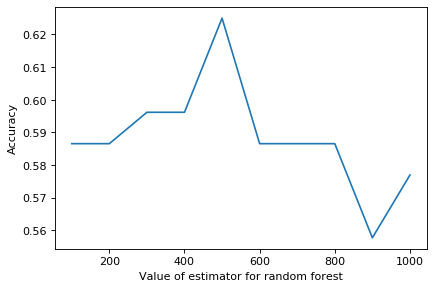

In [10]:
# plot the value of estimator for Random forest (x-axis) versus the accuracy (y-axis) to find best estimator value
plt.figure(dpi=80)
plt.plot(estimator_range, estimator_scores)
plt.xlabel('Value of estimator for random forest')
plt.ylabel('Accuracy')

In [11]:
#Run test with best parameter: 
randomforest = RandomForestClassifier(n_estimators=700)
quick_test_afew_times(randomforest, X, y)

0.5740384615384615

In [12]:
#Parameter tuning for Decision Tree

# search for an optimal value of depth for decision tree
depth_range = list(range(1, 11))
depth_scores = []
for k in depth_range:
    decisiontree = DecisionTreeClassifier(max_depth=k)
    decisiontree.fit(X_train, y_train)    
    scores = decisiontree.score(X_test, y_test)
    depth_scores.append(scores) # use average accuracy as an estimate of out-of-sample accuracy
print(depth_scores)

[0.5288461538461539, 0.5576923076923077, 0.5192307692307693, 0.5192307692307693, 0.5384615384615384, 0.49038461538461536, 0.5192307692307693, 0.5384615384615384, 0.5096153846153846, 0.49038461538461536]


Text(0, 0.5, 'Accuracy')

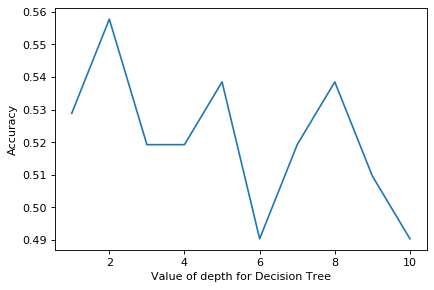

In [13]:
# plot the value of depth for Decision tree (x-axis) versus the accuracy (y-axis) to find best K value
plt.figure(dpi=80)
plt.plot(depth_range, depth_scores)
plt.xlabel('Value of depth for Decision Tree')
plt.ylabel('Accuracy')

In [14]:
#Run test with best parameter: 
decisiontree = DecisionTreeClassifier(max_depth=2)
quick_test_afew_times(decisiontree, X, y)

0.5365384615384616

In [19]:
#Alternatve method for multiple parameters tuning using Gridsearch

In [20]:
from sklearn.model_selection import GridSearchCV
#Parameter tunning for Random Forest
# define the parameter values that should be searched
est_range = list(range(100, 1100,100))
depth_range = list(range(1, 13))

In [21]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=est_range, max_depth=depth_range) 
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}


In [22]:
#reference for params_grid syntax

# params_grid = {'max_depth': np.arange(3, 10),
#               'max_leaf_nodes':list(xrange(20,100,20)),
#               'max_features':list(xrange(2,10,2))
#                }

In [23]:
# instantiate the grid
grid = GridSearchCV(randomforest, param_grid, cv=5, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train);

In [24]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5884807522774023
{'max_depth': 3, 'n_estimators': 200}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [25]:
# train your model using all data and the best known parameters
randomforest = RandomForestClassifier(n_estimators=700)
randomforest.fit(X, y)

# make a prediction on out-of-sample data
randomforest.predict(X_test)

array([0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1.])

In [26]:
#Parameter tunning for decision Tree

In [36]:
# define the parameter values that should be searched
depth_range = list(range(1, 13))

In [28]:
param_grid = dict(max_depth=depth_range)
print(param_grid)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}


In [37]:
# instantiate the grid
grid = GridSearchCV(decisiontree, param_grid, cv=5, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train);

In [30]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5400235086688217
{'max_depth': 4}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [31]:
#Model selection using cross-validation

In [32]:
#set-up for cross validation

kf = KFold(n_splits=5, shuffle=True, random_state = 42)

In [38]:
# 5-fold cross-validation with the best RF model
randomforest = RandomForestClassifier(n_estimators=200, max_depth=3)
print(cross_val_score(randomforest, X, y, cv=kf, scoring='accuracy').mean())

0.5724421209858102


In [39]:
# 5-fold cross-validation with the best Decision Tree model
decisiontree = DecisionTreeClassifier(max_depth=4)
print(cross_val_score(decisiontree, X, y, cv=kf, scoring='accuracy').mean())

0.5339058999253175


In [42]:
# train your model using all data and the best known parameters
randomforest = RandomForestClassifier(n_estimators=200, max_depth=3)
randomforest.fit(X_train, y_train)

# make a prediction on out-of-sample data
randomforest.predict(X_test)

array([0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1.])

In [43]:
randomforest.score(X_test, y_test)

0.5865384615384616

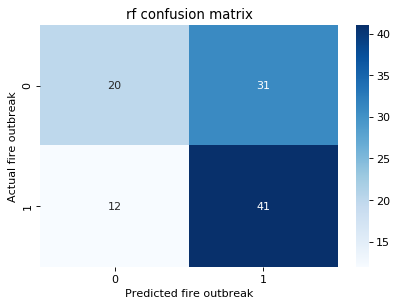

In [45]:
# Print confusion matrix for RF
rf_confusion = confusion_matrix(y_test, randomforest.predict(X_test))
plt.figure(dpi=80)
sns.heatmap(rf_confusion, annot = True, cmap=plt.cm.Blues)

plt.xlabel('Predicted fire outbreak')
plt.ylabel('Actual fire outbreak')
plt.title('rf confusion matrix');

#plt.savefig("confusion_matrix_rf_Forestfire")